In [21]:
# Machine Learning Model 
# LSTM
# Train Data
# x_train lat,lon,distance,speed,time diff
# y_train pred_lat,pred_lon

import pandas as pd
import matplotlib.pyplot as plt




In [24]:
df = pd.read_csv('Dataset.csv')

In [25]:
train_x = df[['Longitude','Latitude','Time_diff','Haversine_Distance','Calculated_Speed']]
train_y=df[['Pred_Lat','Pred_Lon']]

In [28]:

print(train_x.tail(3))


print(train_y.tail(3))

        Longitude   Latitude  Time_diff  Haversine_Distance  Calculated_Speed
19825 -105.434017  41.233209        8.0            3.209280          0.401160
19826 -105.434054  41.233212        5.0            3.111959          0.622392
19827 -105.434079  41.233234       27.0            3.217884          0.119181
        Pred_Lat    Pred_Lon
19825  41.233212 -105.434054
19826  41.233234 -105.434079
19827  41.233234 -105.434079


In [51]:
import numpy as np
# convert pandas dataframe to numpy array

x_data = train_x.values
x_data = np.array(x_data)
x_data = x_data.reshape(19828,5,1)
x_data.shape

(19828, 5, 1)

In [64]:
y_data = train_y.values
y_data.shape

(19828, 2)

In [69]:
import tensorflow as tf

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.recurrent import LSTM,RNN
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split




In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)



In [72]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(13284, 5, 1)
(13284, 2)
(6544, 5, 1)
(6544, 2)


In [107]:
model = Sequential()
model.add(LSTM((2), batch_input_shape=(None,5,1),return_sequences=True))
# model.add(Dense(128, 1))
model.add(LSTM((2),return_sequences=False))



model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()
          




Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 5, 2)              32        
_________________________________________________________________
lstm_27 (LSTM)               (None, 2)                 40        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [104]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Train on 13284 samples, validate on 6544 samples
Epoch 1/50
13284/13284 [==============================] - 10s 757us/sample - loss: 72.8118 - accuracy: 0.9903 - val_loss: 72.3118 - val_accuracy: 1.0000
Epoch 2/50
13284/13284 [==============================] - 5s 341us/sample - loss: 72.3077 - accuracy: 1.0000 - val_loss: 72.3069 - val_accuracy: 1.0000
Epoch 3/50
13284/13284 [==============================] - 5s 347us/sample - loss: 72.3070 - accuracy: 1.0000 - val_loss: 72.3065 - val_accuracy: 1.0000
Epoch 4/50
13284/13284 [==============================] - 5s 343us/sample - loss: 72.3067 - accuracy: 1.0000 - val_loss: 72.3062 - val_accuracy: 1.0000
Epoch 5/50
13284/13284 [==============================] - 5s 346us/sample - loss: 72.3064 - accuracy: 1.0000 - val_loss: 72.3060 - val_accuracy: 1.0000
Epoch 6/50
13284/13284 [==============================] - 5s 365us/sample - loss: 72.3063 - accuracy: 1.0000 - val_loss: 72.3059 - val_accuracy: 1.0000
Epoch 7/50
13284/13284 [==============

In [105]:
result = model.predict(x_test)
result

array([[ 0.99990904, -0.99990875],
       [ 0.99990904, -0.99990875],
       [ 0.99990904, -0.99990875],
       ...,
       [ 0.99990904, -0.99990886],
       [ 0.9999089 , -0.99990875],
       [ 0.99990904, -0.99990875]], dtype=float32)

In [100]:
# for i in range(len(result)):
#     plt.scatter(result[0][i],result[1][i],c='r')
#     plt.scatter(y_test[0][i],y_test[1][i],c='g')

# plt.show()



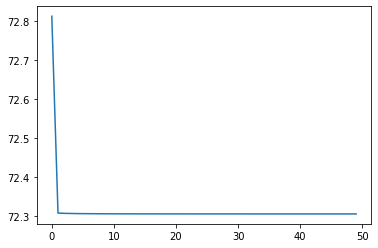

In [108]:
plt.plot(history.history['loss'])
plt.show()